## Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [58]:
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder,PowerTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv?raw=True')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [4]:
df['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

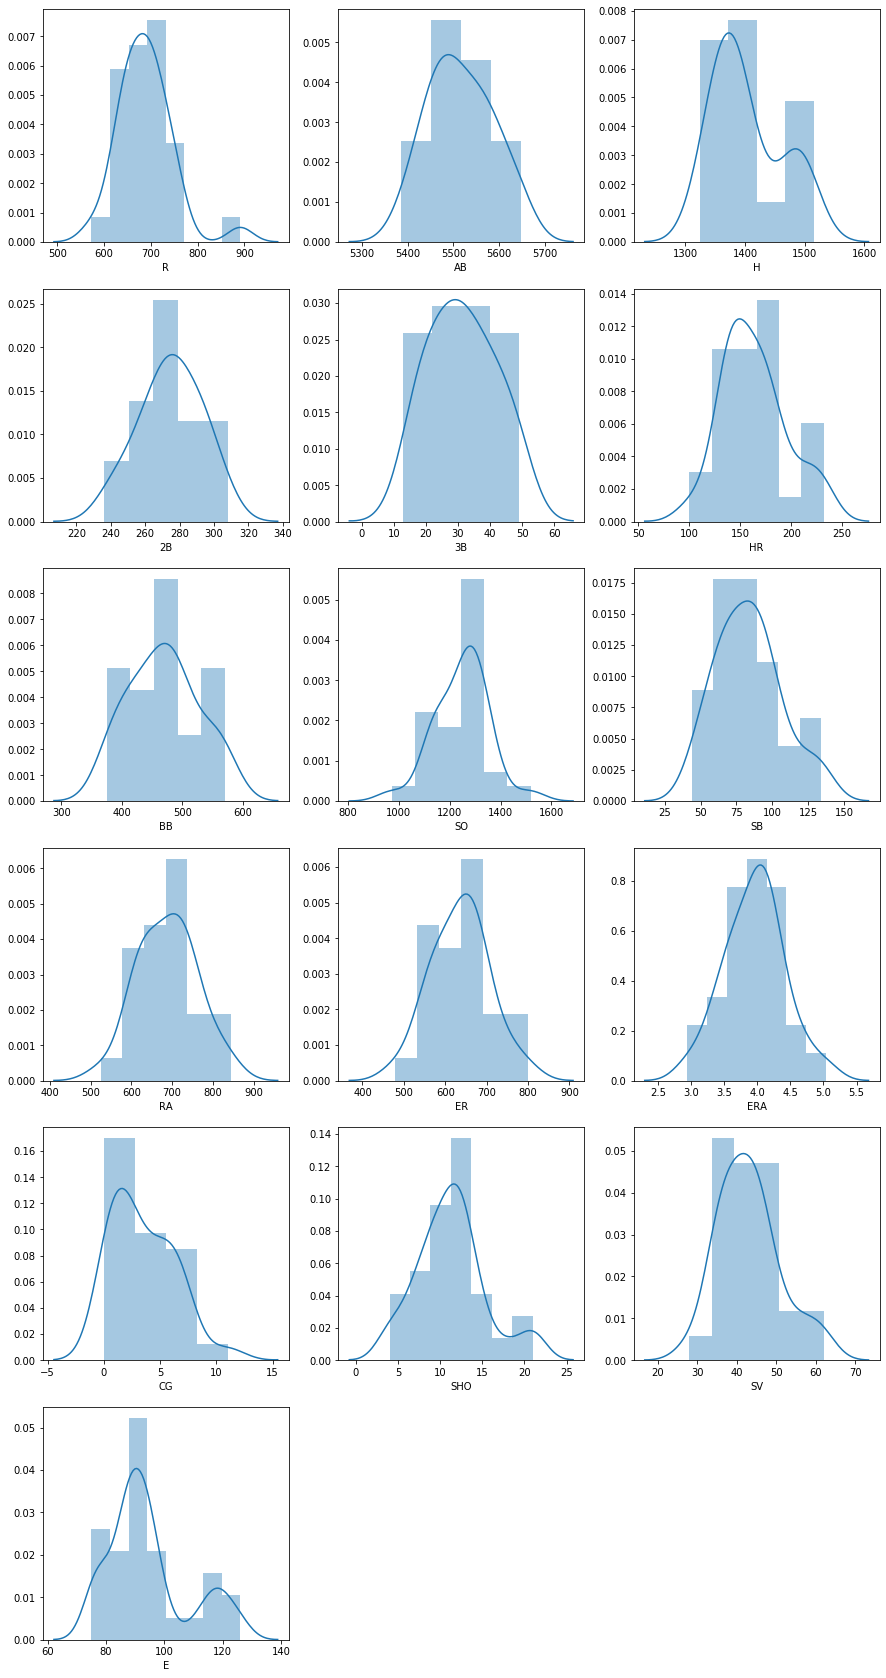

In [10]:
##checking the data distribution

## checking the data distribution
plt.figure(figsize= (15,30))

for i in enumerate(df.drop(columns=['W']).columns):
    plt.subplot(6,3,i[0] + 1)
    sns.distplot(df[i[1]])

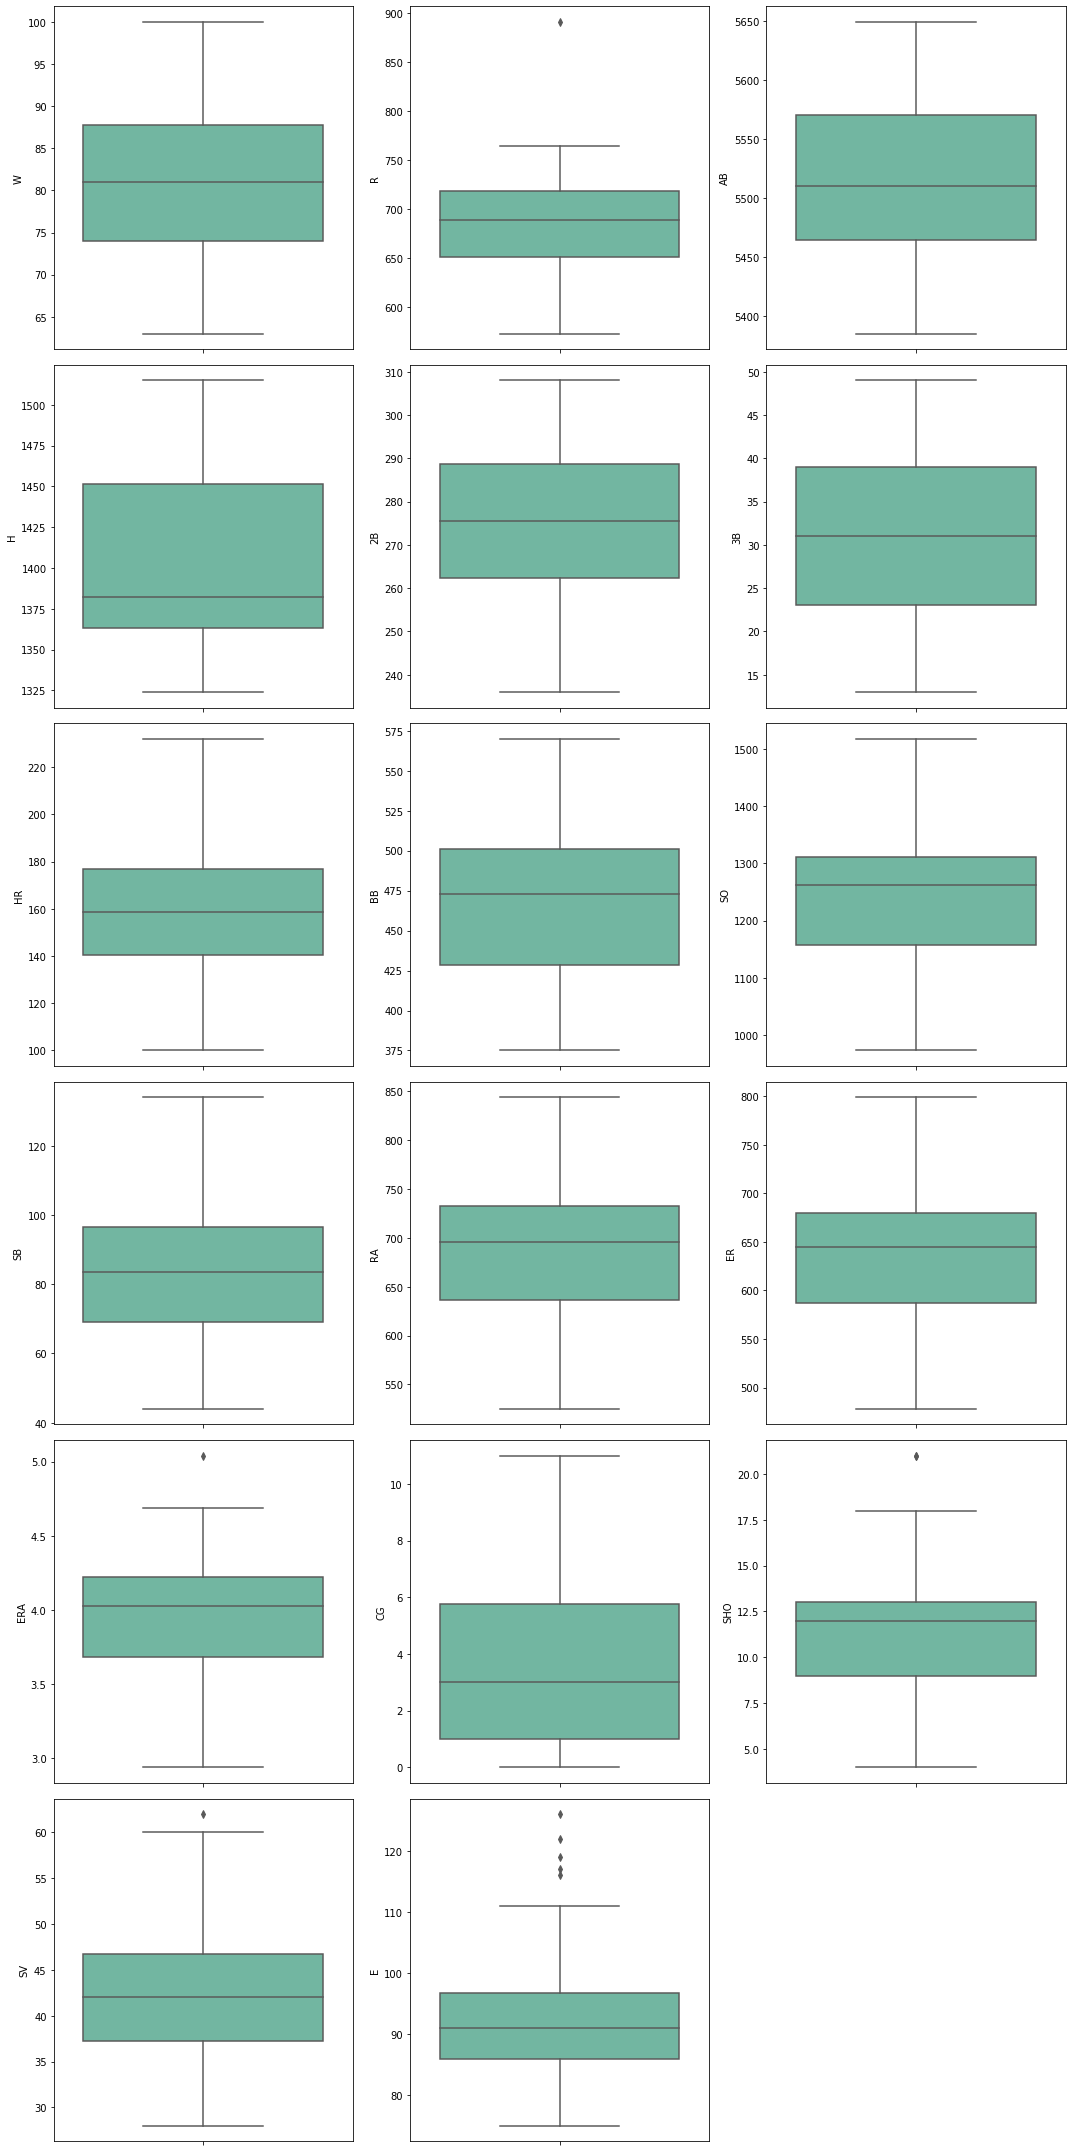

In [13]:
## box plot to check for outliers

## box plot to check for outliers

plt.figure(figsize= (15,30))


for i,el in enumerate(df.columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=df,palette='Set2')
                
                

plt.tight_layout() 

plt.show()


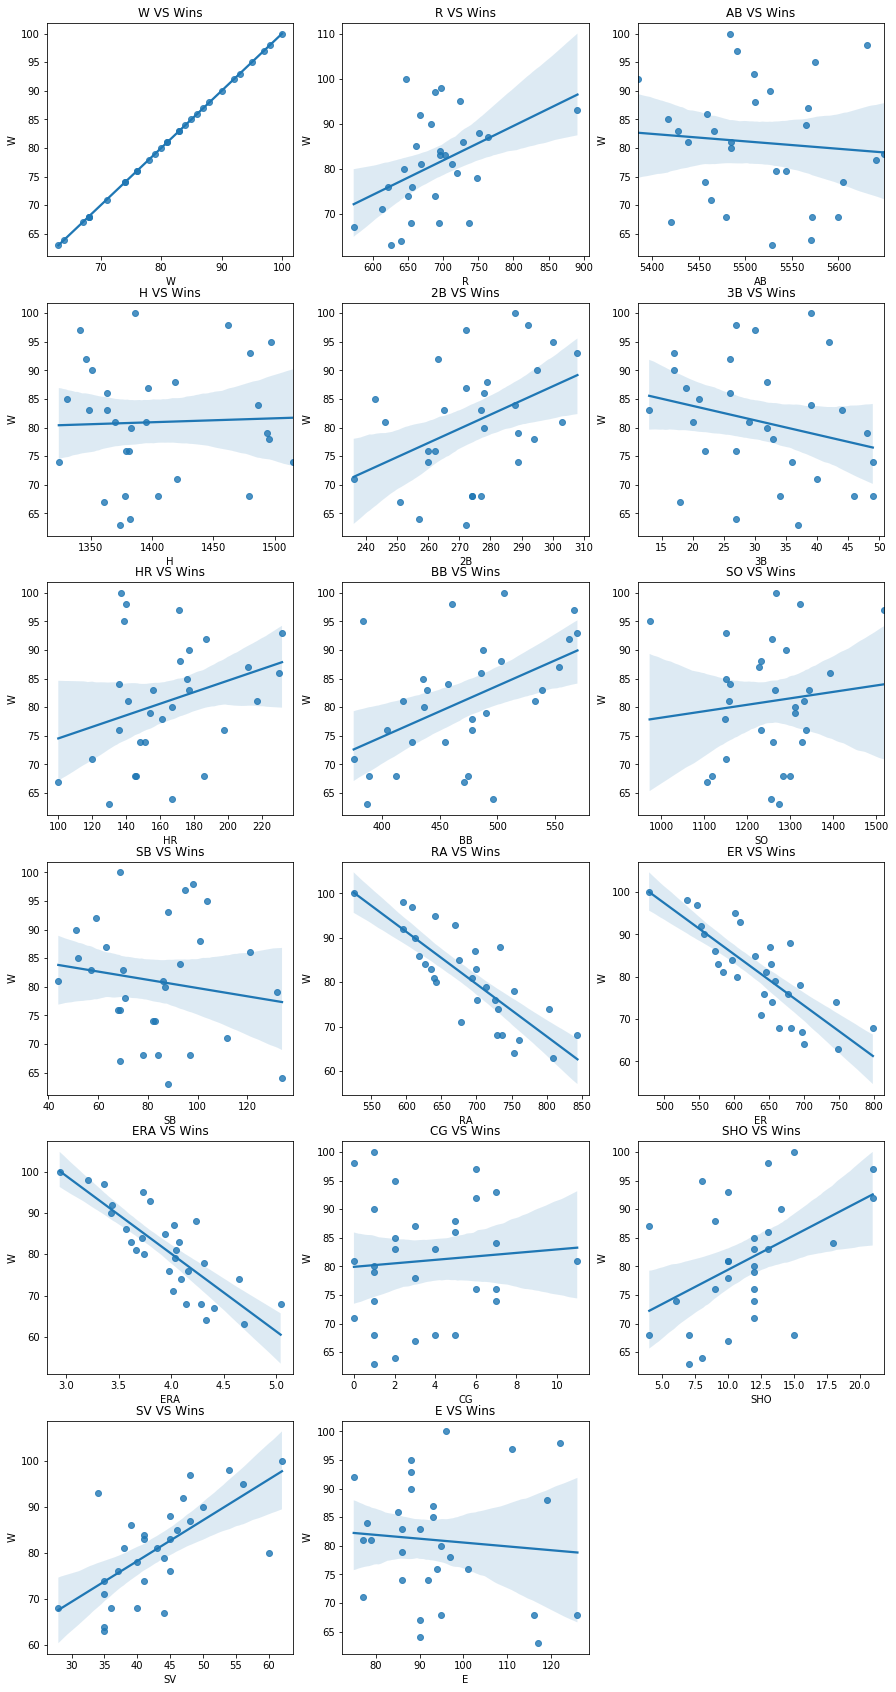

In [20]:
### reg plot 


plt.figure(figsize= (15,30))

for i in enumerate(df.columns):
    plt.subplot(6,3,i[0] + 1)
    sns.regplot(x=i[1],y='W',data=df)
    plt.title(i[1]+' VS Wins')


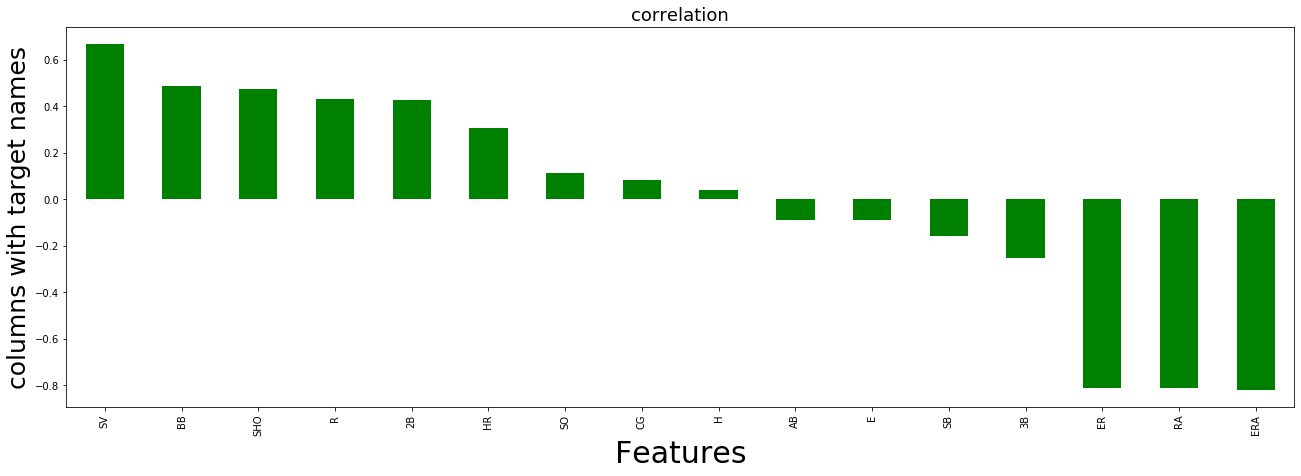

In [22]:
## to checl the positive and negative correlation

plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=30)
plt.ylabel('columns with target names',fontsize=25)
plt.title('correlation',fontsize=18)
plt.show()

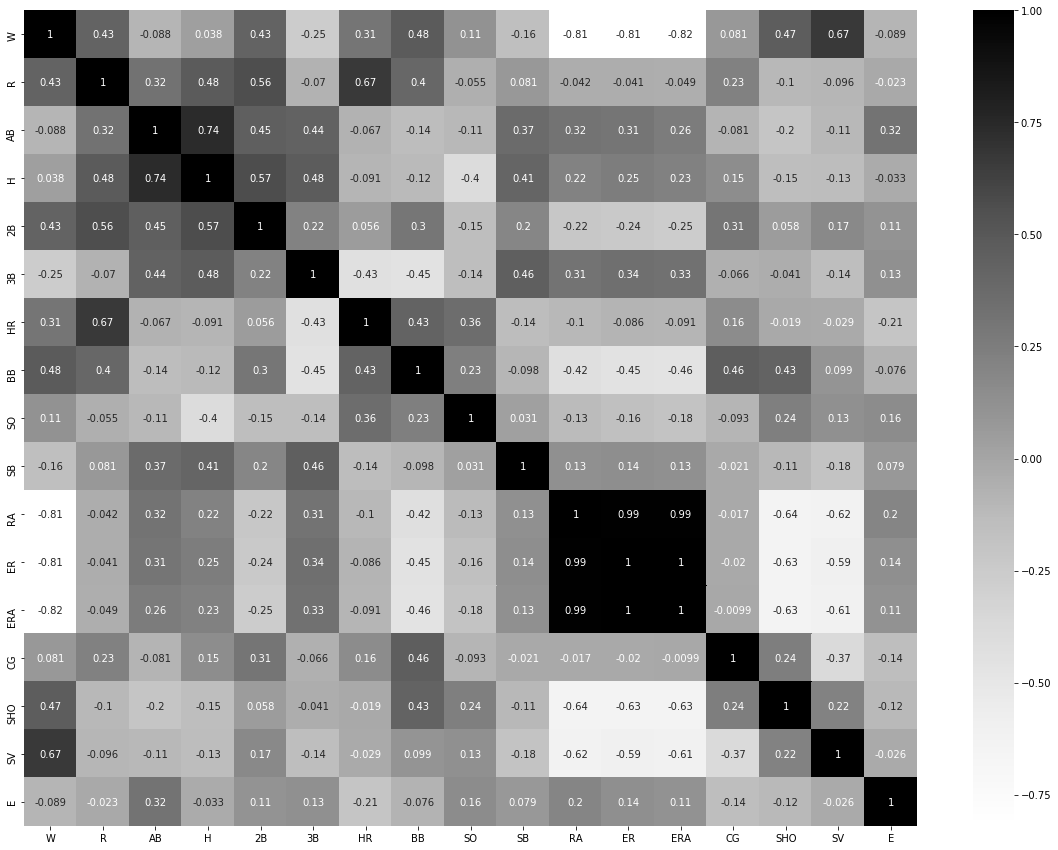

In [23]:

### checking the correlation

plt.rcParams['figure.figsize'] = (20, 15)
corr = df.corr()

sns.heatmap(corr,cmap='Greys' ,annot=True)

In [28]:
corr['W'].nlargest(3)

W     1.000000
SV    0.666530
BB    0.484342
Name: W, dtype: float64

In [30]:
corr['W'].nsmallest(3)

ERA   -0.819600
RA    -0.812952
ER    -0.809435
Name: W, dtype: float64

In [33]:
### removing outliers from the dataset


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_new= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

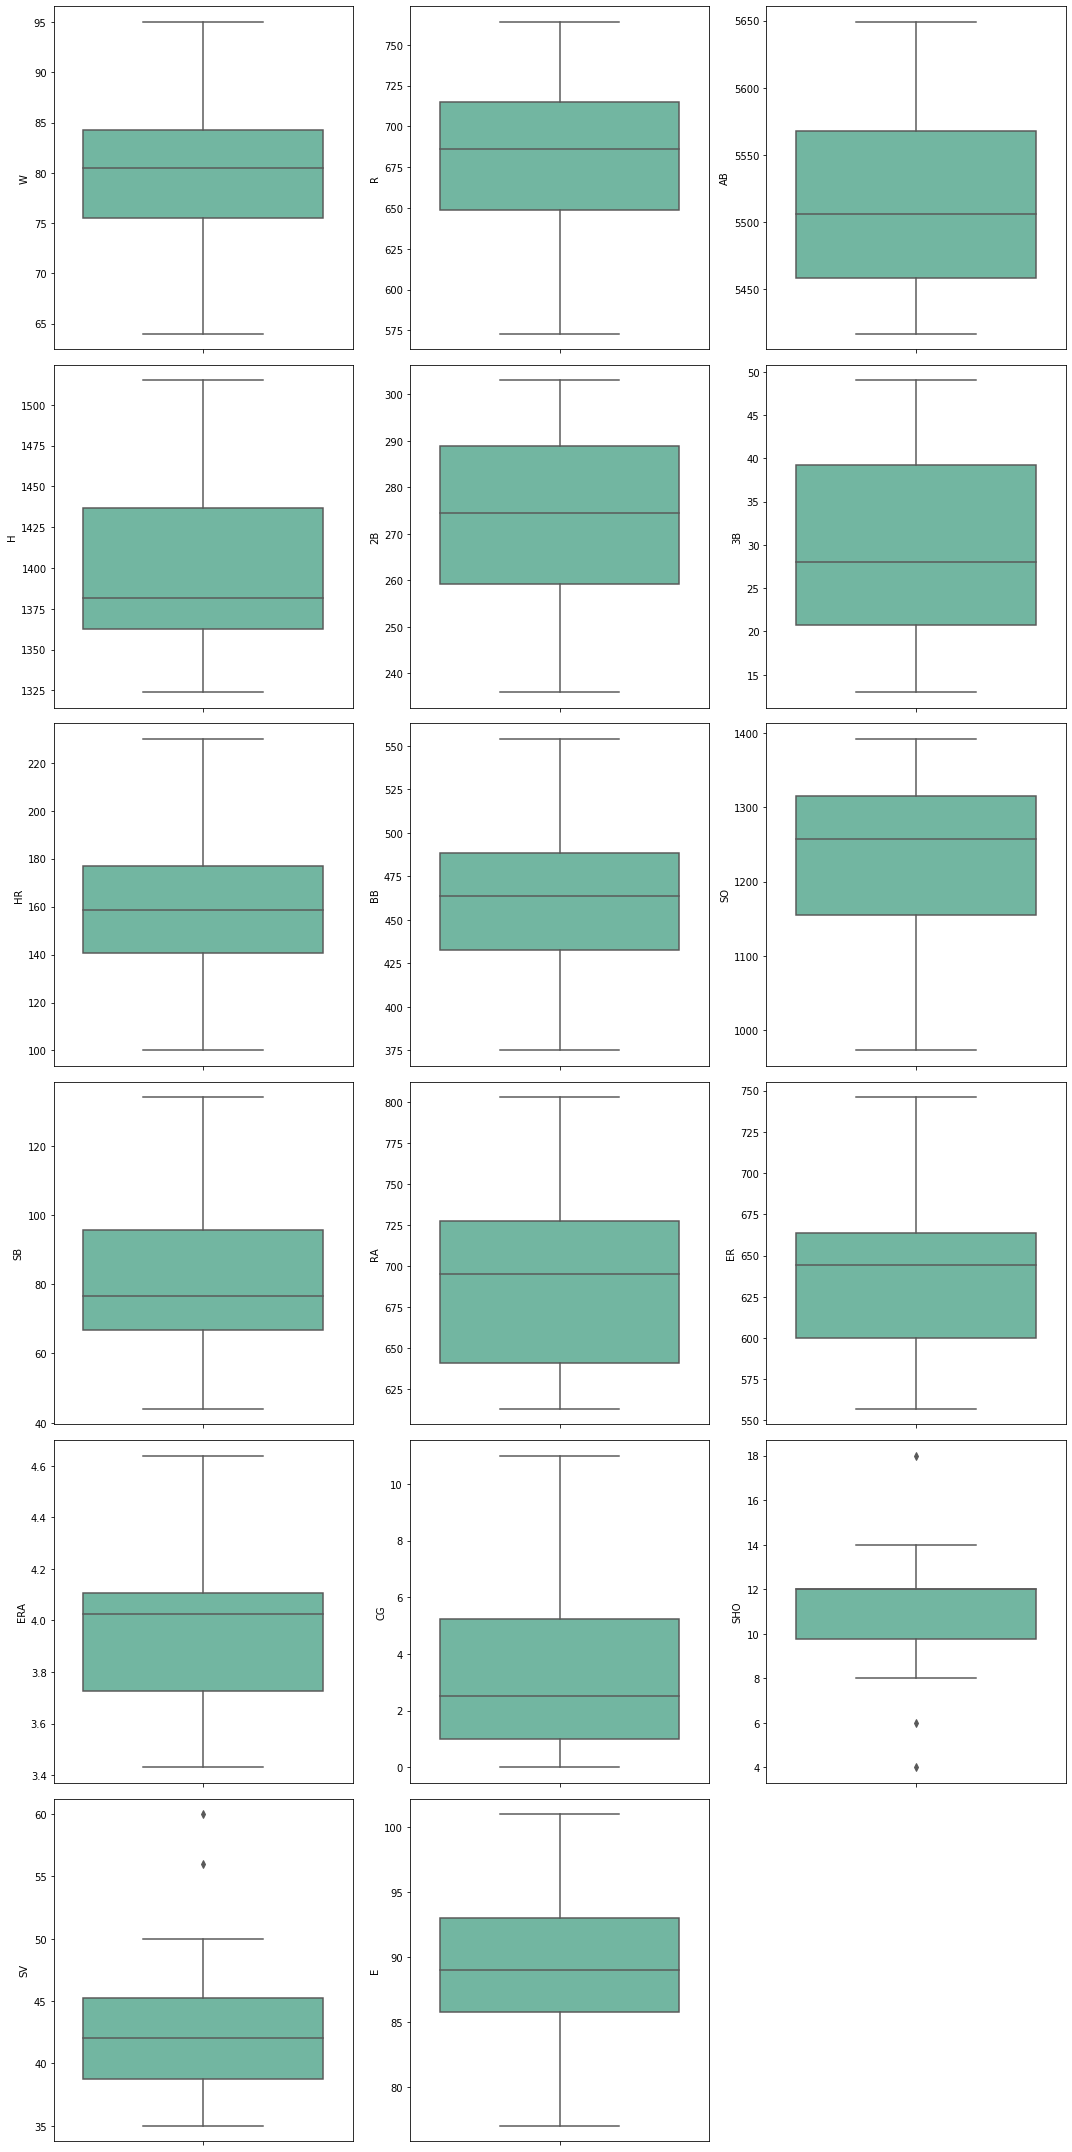

In [35]:
## box plot after removing outliers

## box plot to check for outliers

## box plot to check for outliers

plt.figure(figsize= (15,30))


for i,el in enumerate(df_new.columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=df_new,palette='Set2')
                
                

plt.tight_layout() 

plt.show()

In [36]:
df_new.skew()

W     -0.194773
R     -0.316726
AB     0.345887
H      0.817990
2B    -0.149289
3B     0.268007
HR     0.360341
BB     0.079234
SO    -0.791526
SB     0.639024
RA     0.304559
ER     0.213161
ERA    0.218418
CG     1.082534
SHO   -0.135227
SV     1.043927
E     -0.243990
dtype: float64

In [38]:
## removing skewness using power transform


import warnings
warnings.filterwarnings('ignore')

power = PowerTransformer()
for i in df_new.columns:
    if np.abs(df_new[i].skew()) > 0.5:
        df_new[[i]] = power.fit_transform(df_new[[i]])

In [39]:
## we can observe that skewness is reduced
df_new.skew()

W     -0.194773
R     -0.316726
AB     0.345887
H      0.000000
2B    -0.149289
3B     0.268007
HR     0.360341
BB     0.079234
SO    -0.112317
SB     0.012717
RA     0.304559
ER     0.213161
ERA    0.218418
CG    -0.020258
SHO   -0.135227
SV     0.057785
E     -0.243990
dtype: float64

In [40]:
df['W']

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [43]:
## scaling the dataset

X = df_new.drop(columns=['W'])
y = df_new['W']

scale = StandardScaler()
scaled_data = scale.fit_transform(X)

In [51]:
pd.DataFrame(scaled_data,columns = df_new.drop(columns =['W']).columns)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.945647,0.850459,0.0,1.428247,1.120003,-0.755009,-1.654922,-2.065604,0.911287,-0.933524,-0.788633,-0.824411,-0.291793,-0.970292,1.689151,-0.038219
1,0.348621,-0.675281,0.0,0.248725,1.308239,-0.223533,-0.482555,0.163141,-0.354606,0.189369,0.286306,0.308113,-0.291793,0.391521,0.490304,-0.343973
2,-0.227083,-1.070844,0.0,1.582098,-0.103530,-0.692483,1.485348,-0.897936,0.311689,-0.952556,-1.140055,-1.024268,1.910709,-0.289385,-0.811459,-1.414110
3,-1.229234,0.257115,0.0,-0.623095,-0.291766,-0.848799,-1.215284,-0.200053,-0.449841,0.208401,0.079587,0.008327,1.230098,-0.629839,-1.054424,1.949179
4,0.199364,1.274276,0.0,0.864128,1.778828,-0.379849,-0.147593,0.105902,0.198013,2.149675,2.208792,2.206755,1.230098,0.391521,-1.598652,-0.343973
5,1.798541,0.737441,0.0,-0.007693,-1.044709,1.527213,1.924985,-0.241791,-0.702422,0.151305,0.265634,0.174875,0.137076,-2.332105,0.893501,0.726165
6,0.711101,-0.420991,0.0,-1.341065,-0.950591,1.683530,-0.922193,1.011577,-1.921754,0.056145,0.141602,0.241494,-1.805975,-0.289385,0.177421,-1.719864
7,-0.760142,-0.420991,0.0,0.300009,0.178824,0.120364,-0.545360,0.728787,0.348589,-0.914492,-0.726617,-0.791101,-0.872842,0.391521,1.980566,1.031918
8,1.457383,1.768729,0.0,1.120546,0.272942,-0.067216,0.333915,-0.972689,-0.308131,1.198071,1.133853,1.107541,0.137076,-0.289385,-0.374918,1.337672
9,1.052259,-0.788299,0.0,0.300009,-0.385883,2.089953,0.501396,1.927824,1.378364,-1.371263,-1.388118,-1.357363,0.765939,0.731975,-0.585480,-0.496850


In [55]:
### using pca to remove multicolinearity


pca = PCA(n_components=6)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

df_pca=pd.DataFrame(x_pca,columns=['Feature_'+str(i) for i  in range(0,8)])





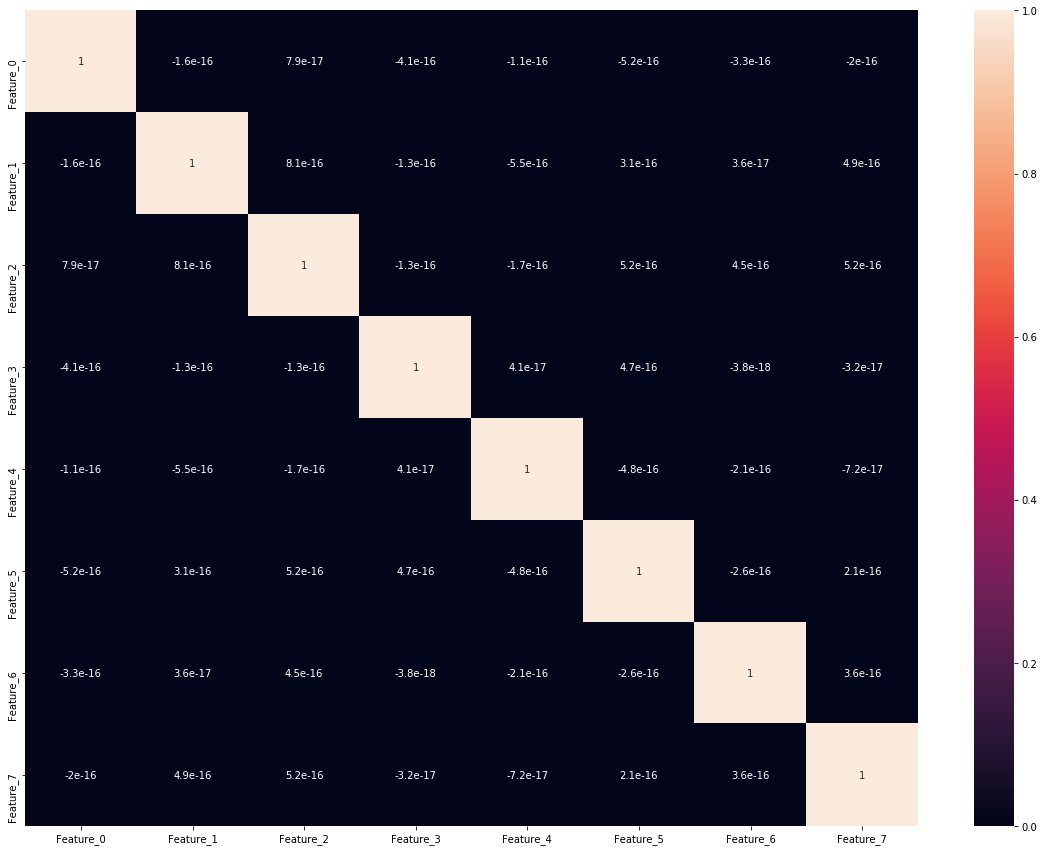

In [56]:
## checking heat map for multicolinearity

sns.heatmap(df_pca.corr(),annot=True)

In [59]:
## finding the best random state value


def find_best_score():
    randomstate = 0
    max_score = 0
    lr = LinearRegression()
    for i in range(1,800):
        x_train,x_test,y_train,y_test = train_test_split(df_pca,y,test_size=.20,random_state = i)
        lr.fit(x_train,y_train)
        pred = lr.predict(x_test)
        score = r2_score(y_test,pred)
        if(score>max_score):
            max_score = score
            randomstate  = i
            rmse=np.sqrt(mean_squared_error(y_test,pred))
    print( 'Best Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100, 'RMSE score :', round(rmse,2))

find_best_score()

Best Random State= 245  and R2 Score of LR MODEL :  96.99312397797377 RMSE score : 1.25


In [78]:
### using the best random state to split the data
x_train,x_test,y_train,y_test = train_test_split(df_pca,y,test_size=.20,random_state = 245)

In [79]:
### Findin the best fit model
import numpy as np


model_list = [
    LinearRegression(),
    Lasso(),
    Ridge(alpha=.1),
    ElasticNet(),
    RandomForestRegressor(n_estimators=100),
    SVR(kernel= 'poly',C=1,gamma='scale',degree=3,coef0=10),
    AdaBoostRegressor(n_estimators=100),
    DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=11)
]

index_list = ['LR','LAS','RIDGE','ELN','RF','ABR','SVR','DTR','KNR']

def find_best_model(models,x_train,y_train,x_test,y_test,y):
    r2_scores = []
    cv_scores = []
    mse_scores = []
    rmse_scores = []
    for model in models:
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test,y_pred)
        mse=mean_squared_error(y_test,y_pred)
        r2_scores.append(score)
        mse_scores.append(mse)
        rmse_scores.append(np.sqrt(mse))
        cv_scores.append(np.mean(cross_val_score(model,df_pca,y,cv=3,scoring='r2')))
    df = pd.DataFrame(list(zip(r2_scores,cv_scores,mse_scores,rmse_scores)),columns=['R2_Score','CV_Score','MSE_Score','RMSE_Score'],index=index_list)
    df['Score_Diff'] = df['R2_Score'] - df['CV_Score']
    return df

best_mod_df = find_best_model(model_list,x_train,y_train,x_test,y_test,y)

In [80]:
best_mod_df

,R2_Score,CV_Score,MSE_Score,RMSE_Score,Score_Diff
LR,0.969931,0.649458,1.571093,1.253432,0.320474
LAS,0.799387,0.484876,10.482004,3.237592,0.314512
RIDGE,0.971272,0.661145,1.501050,1.225173,0.310127
ELN,0.853585,0.534485,7.650179,2.765896,0.319100
RF,0.592128,0.230660,21.311325,4.616419,0.361468
ABR,0.606995,0.336330,20.534502,4.531501,0.270665
SVR,0.497336,0.168912,26.264172,5.124858,0.328424
DTR,0.009569,-0.681282,51.750000,7.193747,0.690852
KNR,0.386334,-0.055310,32.064050,5.662513,0.441644


In [87]:
### hyper parameter tuning the ridge regression 

parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters,cv=3)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [88]:
ridge= Ridge(alpha=10, solver= 'saga')
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
score = r2_score(y_test,y_pred)
print(score)
cross_val =cross_val_score(ridge,df_pca,y,cv=3,scoring='r2')
print(np.mean(cross_val))

0.9141777126828701
0.5808069698592856


In [92]:
## lasso hyper parameter tuning

parameter = {'alpha':[0.01, 0.1, 1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}


GCV=GridSearchCV(Lasso(),parameter,cv=2)
GCV.fit(x_train,y_train)

GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 10,
 'selection': 'random',
 'tol': 100}

In [93]:

Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=10, selection="random", tol=100)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
score = r2_score(y_test,y_pred)
print(score)
cross_val =cross_val_score(ridge,df_pca,y,cv=3,scoring='r2')
print(np.mean(cross_val))

-0.15144079647998998
0.5800896157242107
